In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('jobs_final.csv')

In [4]:
df.head(20)

,Company,Location,Job-title,Job-level,Expected Salary lpa,Company size,No of vacancies
0,Smart Food Safe Solutions Inc,Bengaluru,FrontEnd-Engineer,Entry,8,Small,6
1,Mobiveil,Bengaluru,BackEnd-Engineer,Mid-senior,17,Medium,4
2,Open Systems International,Bengaluru,FullStack-Engineer,Senior,22,Medium,2
3,Bloom Solutions,Bengaluru,FrontEnd-Engineer,Mid-senior,14,Small,3
4,CIEL HR Services,Bengaluru,BackEnd-Engineer,Senior,20,Large,3
5,Diageo,Bengaluru,FullStack-Engineer,Entry,17,Medium,7
6,Superior Group,Bengaluru,FrontEnd-Engineer,Senior,18,Large,3
7,Bangalore Base Company,Bengaluru,BackEnd-Engineer,Entry,9,Small,6
8,Bloom Consulting Services,Bengaluru,FullStack-Engineer,Mid-senior,20,Medium,4
9,Ample Technologies,Bengaluru,FrontEnd-Engineer,Entry,8,Small,6


In [4]:
df.tail(10)

,Company,Location,Job-title,Job-level,Expected Salary lpa,Company size,No of vacancies
90,Augusta Infotech,Ahmedabad,FrontEnd-Engineer,Senior,10,Medium,2
91,Capgemini,Ahmedabad,BackEnd-Engineer,Entry,9,Large,9
92,Sonant Technologies Private Limited,Ahmedabad,FullStack-Engineer,Mid-senior,14,Medium,4
93,Atlan,Ahmedabad,FrontEnd-Engineer,Entry,8,Large,9
94,SkillBit,Ahmedabad,BackEnd-Engineer,Senior,12,Medium,2
95,IBM,Ahmedabad,FullStack-Engineer,Mid-senior,14,Large,6
96,Quantiphi,Ahmedabad,FrontEnd-Engineer,Senior,10,Medium,1
97,SISA Information Security Pvt,Ahmedabad,BackEnd-Engineer,Entry,8,Medium,7
98,Samsung R&D Institute India,Ahmedabad,FullStack-Engineer,Mid-senior,14,Large,6
99,CloudMoyo,Ahmedabad,FrontEnd-Engineer,Senior,10,Medium,2


In [5]:
df.isnull().sum()

Company                0
Location               0
Job-title              0
Job-level              0
Expected Salary lpa    0
Company size           0
No of vacancies        0
dtype: int64

<AxesSubplot:>

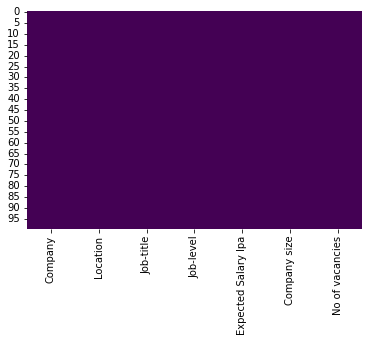

In [6]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [7]:
df.dtypes

Company                object
Location               object
Job-title              object
Job-level              object
Expected Salary lpa     int64
Company size           object
No of vacancies         int64
dtype: object

In [8]:
df['Job-level'].replace(['Entry', 'Mid-senior', 'Senior'], [1,2,3], inplace=True)

In [9]:
df.head()

,Company,Location,Job-title,Job-level,Expected Salary lpa,Company size,No of vacancies
0,Smart Food Safe Solutions Inc,Bengaluru,FrontEnd-Engineer,1,8,Small,6
1,Mobiveil,Bengaluru,BackEnd-Engineer,2,17,Medium,4
2,Open Systems International,Bengaluru,FullStack-Engineer,3,22,Medium,2
3,Bloom Solutions,Bengaluru,FrontEnd-Engineer,2,14,Small,3
4,CIEL HR Services,Bengaluru,BackEnd-Engineer,3,20,Large,3


In [10]:
df.nunique()

Company                90
Location                5
Job-title               3
Job-level               3
Expected Salary lpa    18
Company size            3
No of vacancies         7
dtype: int64

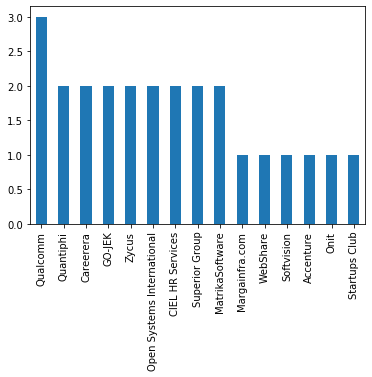

In [5]:
o = df['Company'].value_counts()
o[:15].plot.bar()

,Company,Location,Job-title
0,ADCI HYD 13 SEZ,Delhi,1
69,SAP,Pune,1
68,Rapha English Solutions LLP,Bengaluru,1
67,Rapha English Connect Private Limited,Bengaluru,1
66,Quantiphi,Mumbai,1
...,...,...,...
95,e-Zest Solutions Limited,Pune,1
80,Superior Group,Bengaluru,2
63,Qualcomm,Mumbai,2
50,MatrikaSoftware,Bengaluru,2


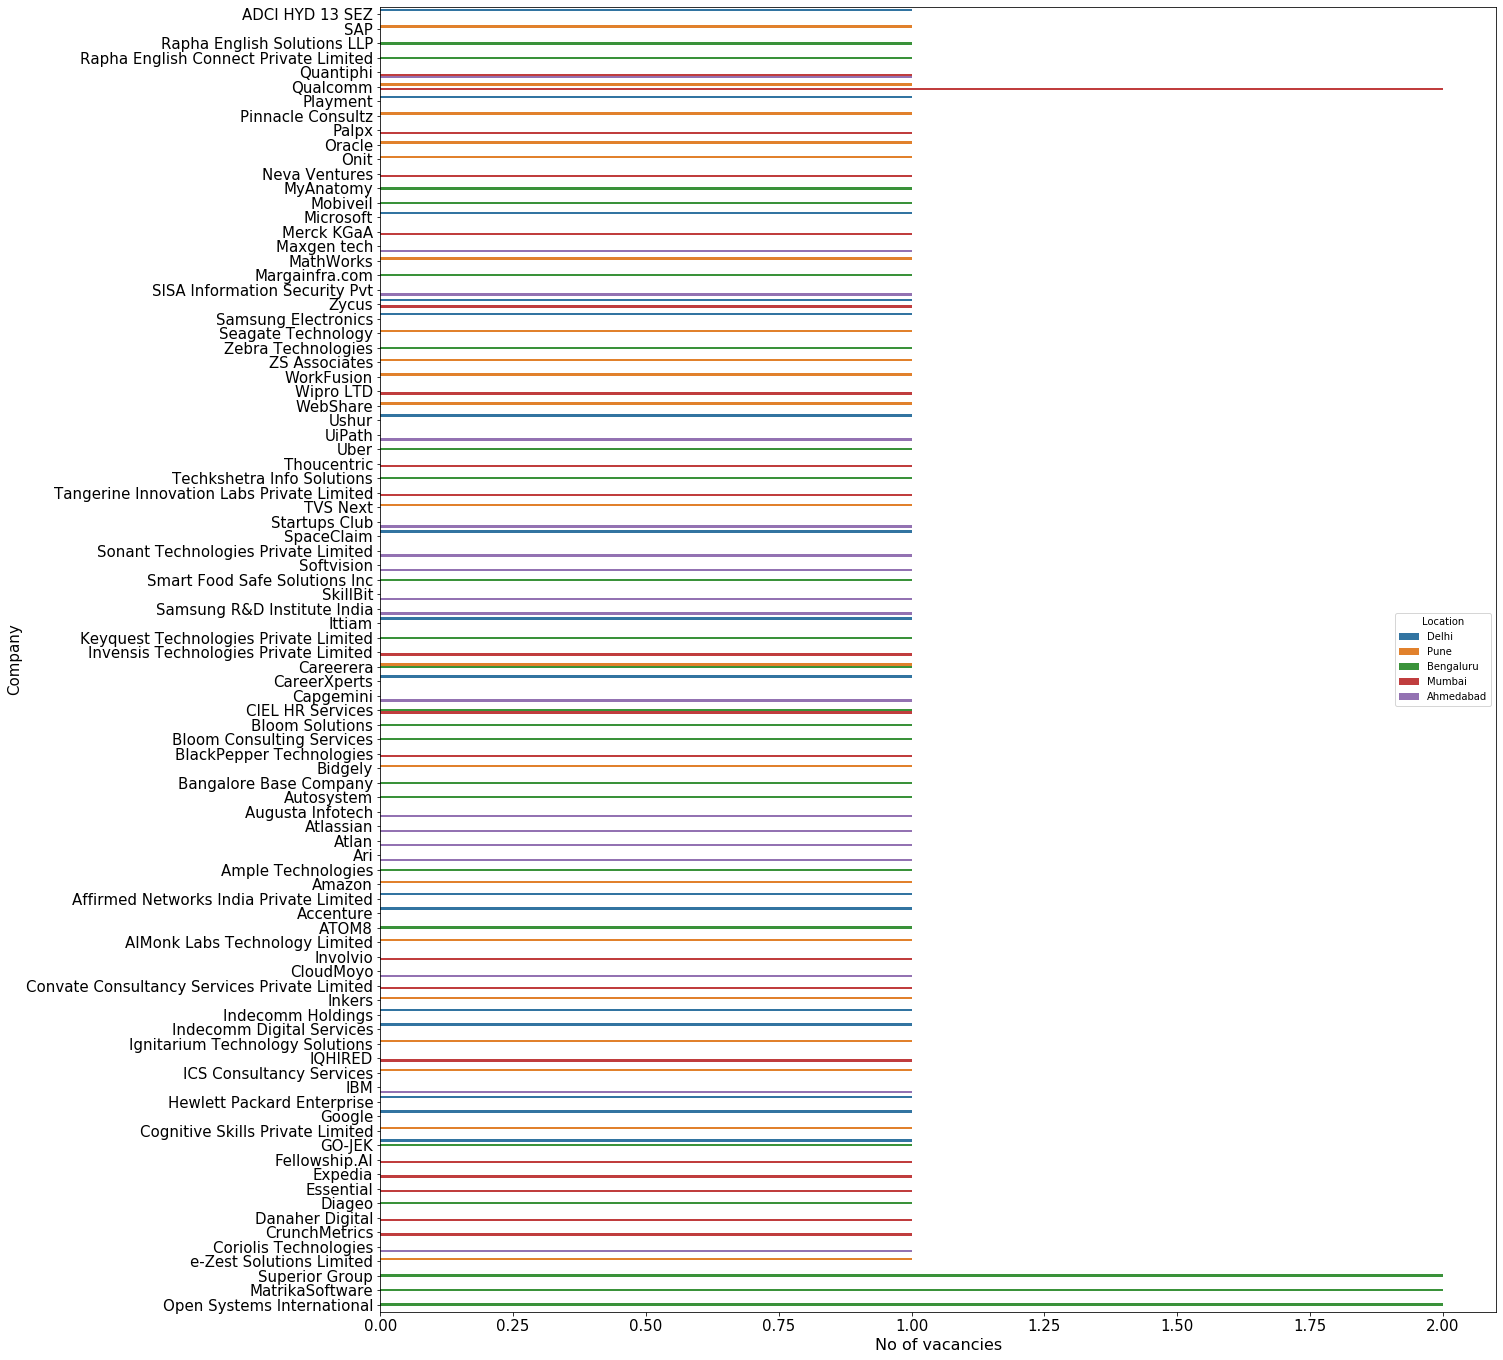

In [10]:
df1 = df.groupby(by=['Company','Location']).size().reset_index(name='Job-title').sort_values(by='Job-title')

plt.figure(figsize=(20,24))
sns.barplot(y='Company', x='Job-title', hue='Location', data=df1);
plt.yticks(size=15)
plt.ylabel('Company', size=15)
plt.xlabel('No of vacancies', size=16)
plt.xticks(size=15)

df1

,count,Position
FrontEnd-Engineer,34,FrontEnd-Engineer
FullStack-Engineer,34,FullStack-Engineer
BackEnd-Engineer,32,BackEnd-Engineer


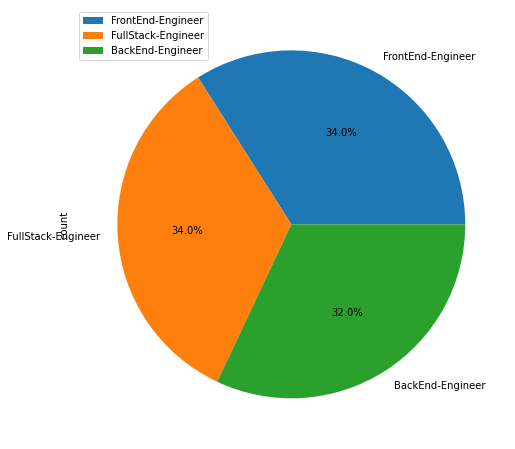

In [19]:
top = pd.DataFrame(df['Job-title'].value_counts()[:10])
top['Position']=top.index
top=top.rename(columns={'Job-title':'count'})
top.plot.pie(y='count',figsize=(35,8),subplots=True,autopct='%1.1f%%',)
plt.legend(loc='upper left')

top

,Job-title,No of vacancies
1,FrontEnd-Engineer,34
2,FullStack-Engineer,34
0,BackEnd-Engineer,32


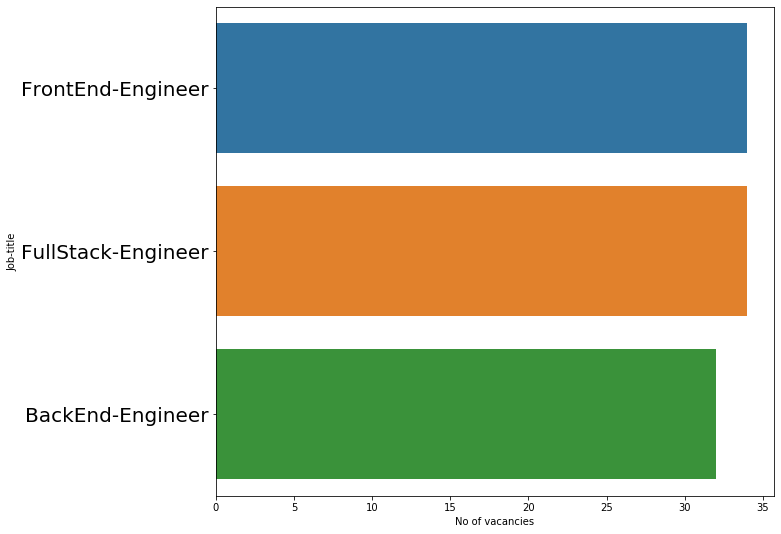

In [11]:
df2=df.groupby(by='Job-title').size().reset_index(name="No of vacancies").sort_values(by='No of vacancies', ascending=False)
plt.figure(figsize=(10,9))
sns.barplot(y='Job-title', x='No of vacancies', data=df2)
plt.yticks(size=20)
df2.head(20)

,count,City
Bengaluru,26,Bengaluru
Mumbai,21,Mumbai
Pune,20,Pune
Ahmedabad,17,Ahmedabad
Delhi,16,Delhi


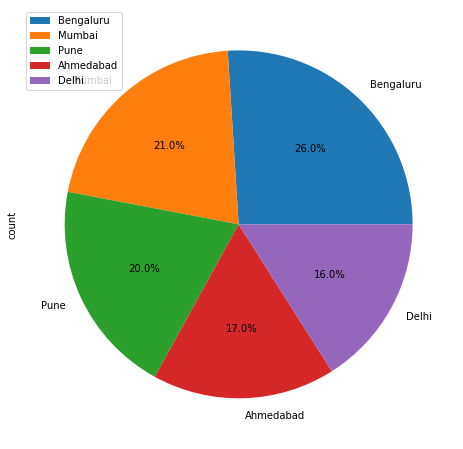

In [21]:
top2=pd.DataFrame(df['Location'].value_counts()[:10])
top2["City"]=top2.index
top2=top2.rename(columns={'Location':'count'})
top2.plot.pie(y="count",figsize=(35,8),subplots=True,autopct='%1.1f%%',)
plt.legend(loc="upper left")

top2

,Job-title,Location,No of vacancies
1,BackEnd-Engineer,Bengaluru,9
6,FrontEnd-Engineer,Bengaluru,9
11,FullStack-Engineer,Bengaluru,8
13,FullStack-Engineer,Mumbai,8
4,BackEnd-Engineer,Pune,7
8,FrontEnd-Engineer,Mumbai,7
9,FrontEnd-Engineer,Pune,7
3,BackEnd-Engineer,Mumbai,6
5,FrontEnd-Engineer,Ahmedabad,6
10,FullStack-Engineer,Ahmedabad,6


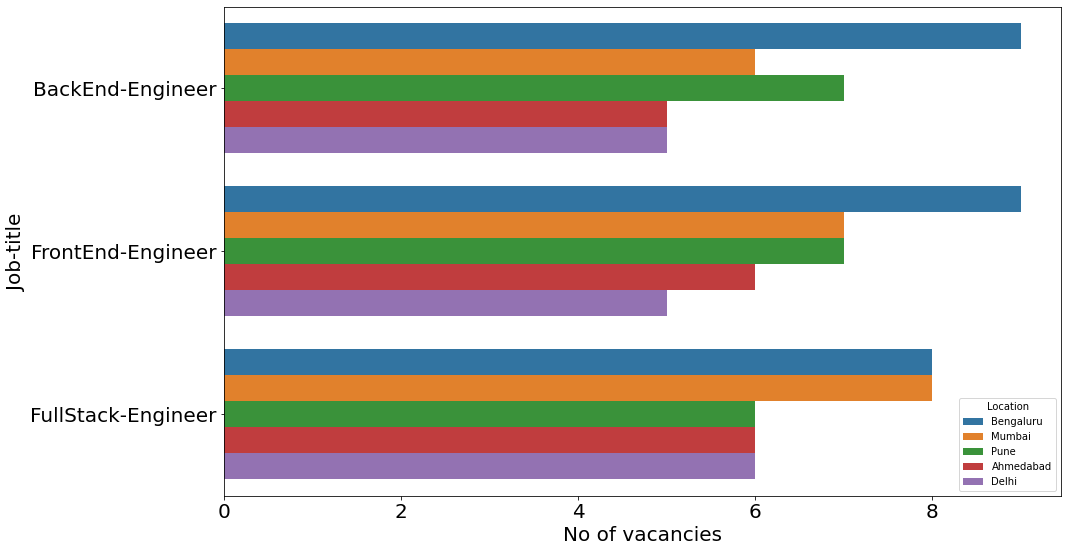

In [23]:
df3=df.groupby(by=["Job-title","Location"]).size().reset_index(name="No of vacancies").sort_values(by="No of vacancies",ascending=False)
plt.figure(figsize=(15,9))
sns.barplot(x="No of vacancies",y="Job-title",data=df3.head(20),hue="Location")
plt.yticks(size=20)
plt.ylabel("Job-title",size=20)
plt.xlabel("No of vacancies",size=20)
plt.xticks(size=20)
df3.head(20)

In [25]:
FrontEnd_Engineer = df[(df['Job-title']=='FrontEnd-Engineer')]
FrontEnd_Engineer.head()

,Company,Location,Job-title,Job-level,Expected Salary lpa,Company size,No of vacancies
0,Smart Food Safe Solutions Inc,Bengaluru,FrontEnd-Engineer,1,8,Small,6
3,Bloom Solutions,Bengaluru,FrontEnd-Engineer,2,14,Small,3
6,Superior Group,Bengaluru,FrontEnd-Engineer,3,18,Large,3
9,Ample Technologies,Bengaluru,FrontEnd-Engineer,1,8,Small,6
12,Superior Group,Bengaluru,FrontEnd-Engineer,2,16,Large,6


,Location,count
1,Bengaluru,9
3,Mumbai,7
4,Pune,7
0,Ahmedabad,6
2,Delhi,5


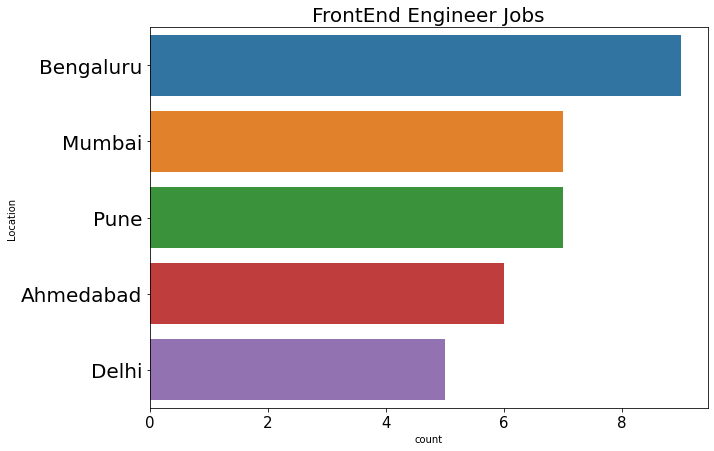

In [27]:
df5=FrontEnd_Engineer.groupby(by="Location").size().reset_index(name="count").sort_values(by="count",ascending=False)
plt.figure(figsize=(10,7))
plt.yticks(size=20)
sns.barplot(y="Location",x="count",data=df5.head(20))
plt.title("FrontEnd Engineer Jobs",size=20)
plt.xticks(size=15)
df5.head(5)

In [28]:
BackEnd_Engineer = df[(df['Job-title']=='BackEnd-Engineer')]
BackEnd_Engineer.head()

,Company,Location,Job-title,Job-level,Expected Salary lpa,Company size,No of vacancies
1,Mobiveil,Bengaluru,BackEnd-Engineer,2,17,Medium,4
4,CIEL HR Services,Bengaluru,BackEnd-Engineer,3,20,Large,3
7,Bangalore Base Company,Bengaluru,BackEnd-Engineer,1,9,Small,6
10,Autosystem,Bengaluru,BackEnd-Engineer,3,18,Medium,1
13,MyAnatomy,Bengaluru,BackEnd-Engineer,1,14,Medium,7


,Location,count
1,Bengaluru,9
4,Pune,7
3,Mumbai,6
0,Ahmedabad,5
2,Delhi,5


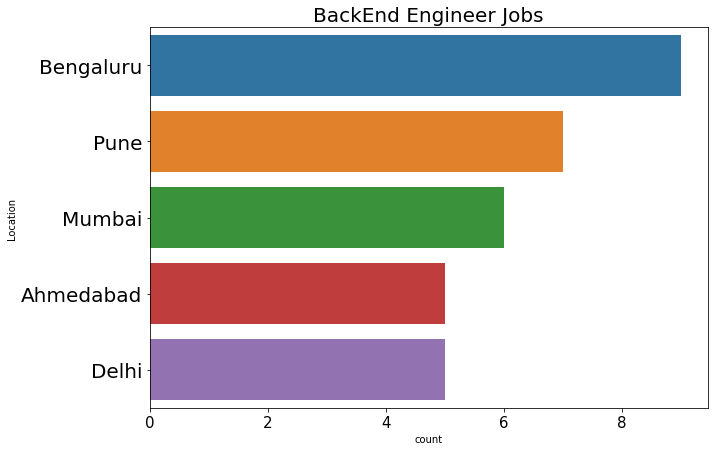

In [33]:
df6=BackEnd_Engineer.groupby(by="Location").size().reset_index(name="count").sort_values(by="count",ascending=False)
plt.figure(figsize=(10,7))
plt.yticks(size=20)
sns.barplot(y="Location",x="count",data=df6.head(20))
plt.title("BackEnd Engineer Jobs",size=20)
plt.xticks(size=15)
df6.head(10)

In [35]:
Fullstack_Engineer = df[(df['Job-title']=='FullStack-Engineer')]
Fullstack_Engineer.head()

,Company,Location,Job-title,Job-level,Expected Salary lpa,Company size,No of vacancies
2,Open Systems International,Bengaluru,FullStack-Engineer,3,22,Medium,2
5,Diageo,Bengaluru,FullStack-Engineer,1,17,Medium,7
8,Bloom Consulting Services,Bengaluru,FullStack-Engineer,2,20,Medium,4
11,Rapha English Connect Private Limited,Bengaluru,FullStack-Engineer,2,20,Small,3
14,Keyquest Technologies Private Limited,Bengaluru,FullStack-Engineer,3,22,Small,2


,Location,count
1,Bengaluru,8
3,Mumbai,8
0,Ahmedabad,6
2,Delhi,6
4,Pune,6


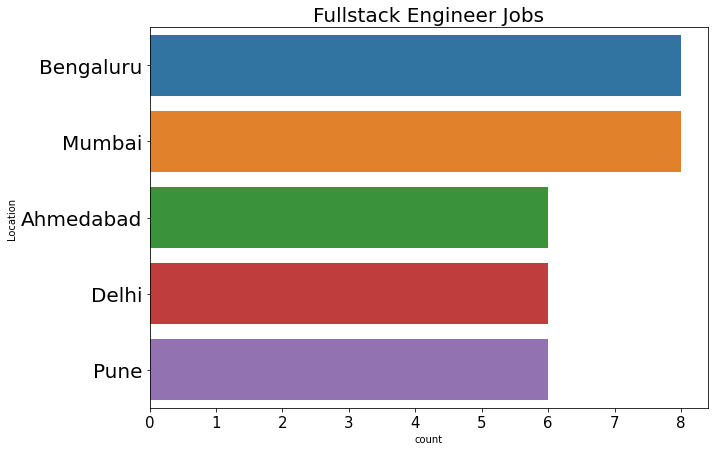

In [36]:
df7=Fullstack_Engineer.groupby(by="Location").size().reset_index(name="count").sort_values(by="count",ascending=False)
plt.figure(figsize=(10,7))
plt.yticks(size=20)
sns.barplot(y="Location",x="count",data=df7.head(20))
plt.title("Fullstack Engineer Jobs",size=20)
plt.xticks(size=15)
df7.head(10)

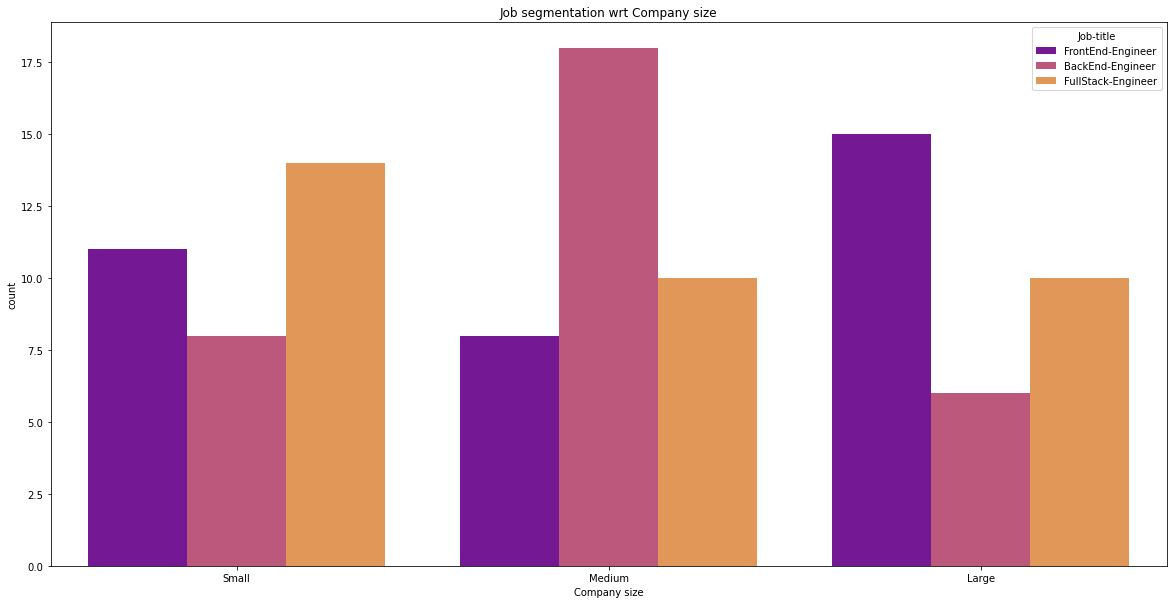

In [39]:
plt.figure(figsize=(20,10))
sns.countplot(x='Company size', hue='Job-title', data=df, palette='plasma')
plt.title('Job segmentation wrt Company size')
plt.show()

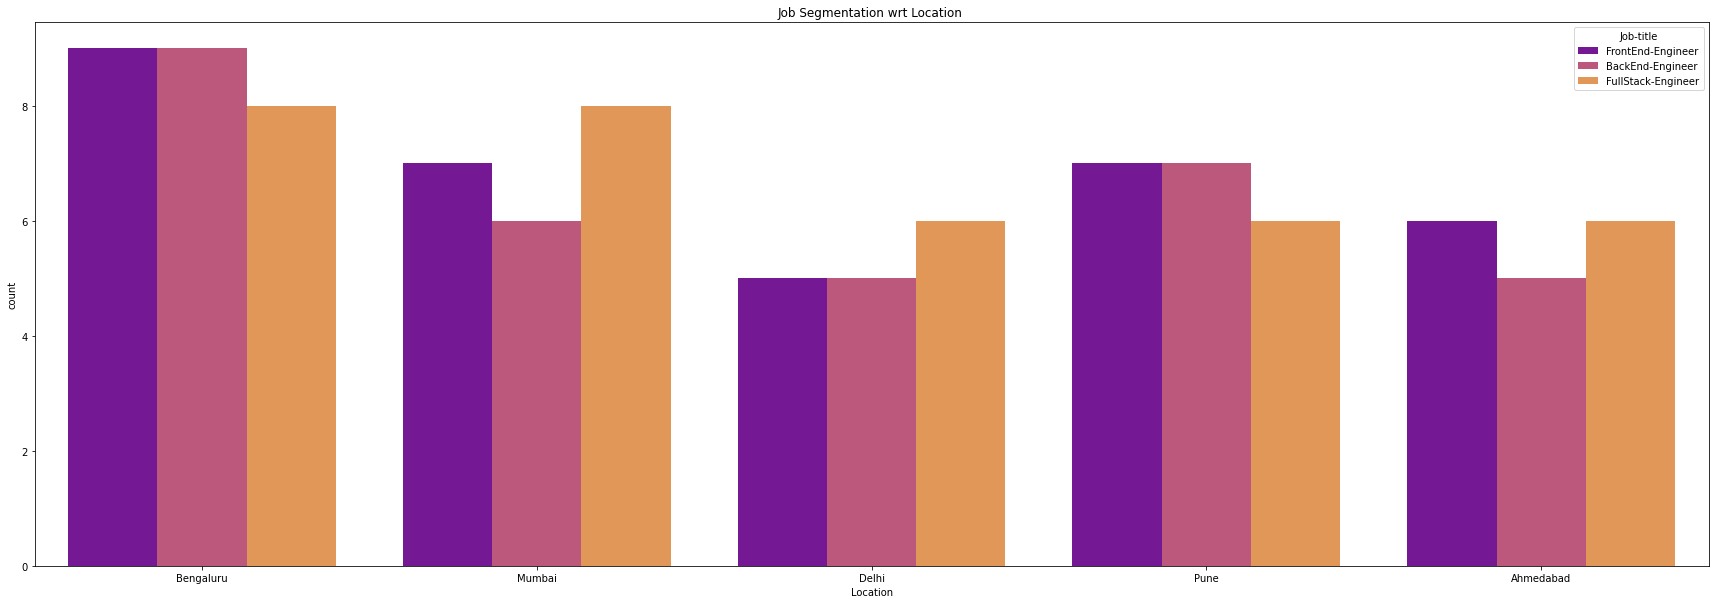

In [40]:
plt.figure(figsize=(30,10))
sns.countplot(x='Location',hue='Job-title', data=df, palette='plasma')
plt.title("Job Segmentation wrt Location ")
plt.show()

In [42]:
df['Job-title'].replace(['FrontEnd-Engineer', 'BackEnd-Engineer', 'FullStack-Engineer'], [1,2,3], inplace=True)

In [44]:
from sklearn import preprocessing

def Labelencode(column):
    
    le = preprocessing.LabelEncoder()
    le.fit(df[column])
    df[column] = le.transform(df[column])

    return

In [45]:
object_col = ['Company']
for col in object_col:
    Labelencode(col)

In [46]:
from sklearn.cluster import KMeans

X=df[["Job-title","Company"]]
X = np.array(X) 
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\ASHISH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


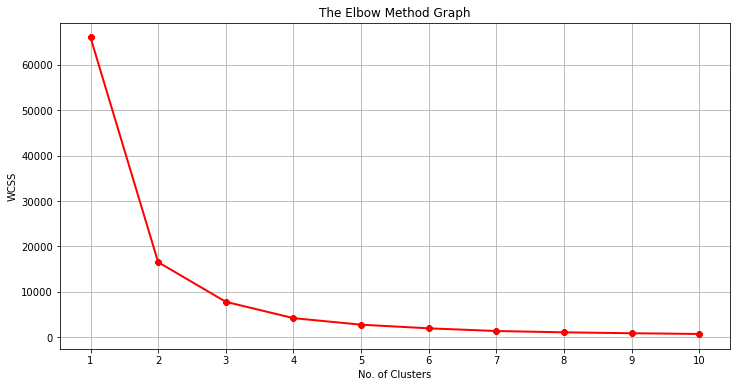

In [47]:
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.title("The Elbow Method Graph") 
plt.xlabel("No. of Clusters")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [48]:
kmeansmodel = KMeans(n_clusters=3,init="k-means++", random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)
y_kmeans

array([0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 2,
       1, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2,
       2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 2, 0,
       1, 1, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1])

In [49]:
from mpl_toolkits.mplot3d import Axes3D

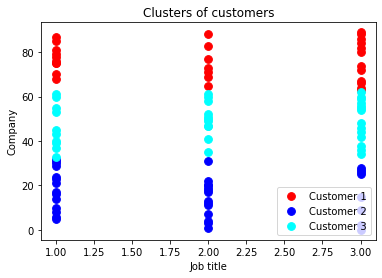

In [51]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1],  c='red', s=60 , label='Customer 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1],  c='blue', s=60 , label='Customer 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1],  c='cyan', s=60 , label='Customer 3')
#plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s=100,c='magenta',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel("Job title")
plt.ylabel("Company")
plt.legend()
plt.show()